# Encoder-Decoder Analysis

### Model Architecture

In [20]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing15_11kV_200_512_04drb/encdec_noing15_11kV_200_512_04drb.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing15_11kV_200_512_04drb/encdec_noing15_11kV_200_512_04drb_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Dropout(0.400000)
  (3): nn.LSTM(200 -> 512)
  (4): nn.Dropout(0.400000)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [21]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 149.09811017842)
('Valid Perplexity: ', 411.16797122661)
('Test Perplexity: ', 418.7480256946)


### Loss vs. Epoch

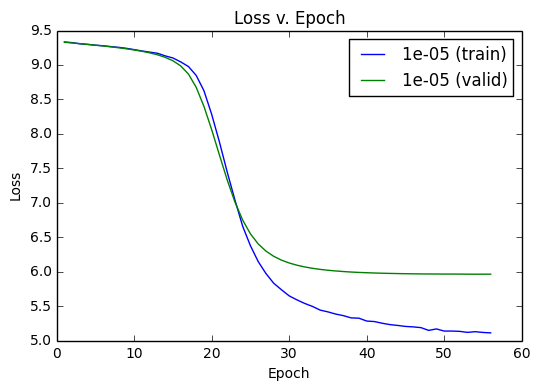

In [22]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

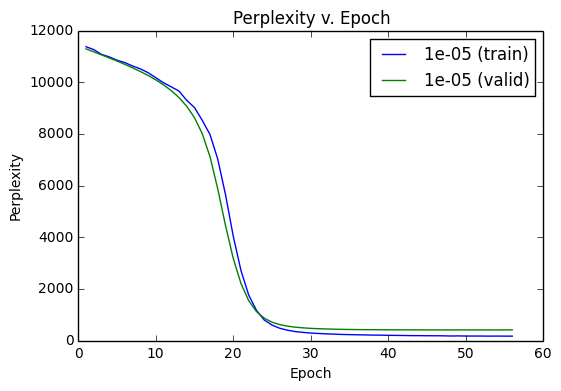

In [23]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [24]:
def print_sample(sample, best_bleu=None):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    if best_bleu is not None:
        cbm = ' '.join([w for w in best_bleu['best_match'].split(' ') if w != '<mask>'])
        print('Closest BLEU Match: ' + cbm + '\n')
        print('Closest BLEU Score: ' + str(best_bleu['best_score']) + '\n')
    print('\n')
    

In [25]:
for i, sample in enumerate(report['train_samples']):
    print_sample(sample, report['best_bleu_matches_train'][i] if 'best_bleu_matches_train' in report else None)

Input:  5 - minute healthy strawberry frozen yogurt

Gend:  <UNK> , , , , , , , , , , , , , , , , , , , , , , , , ,

True:  preheat oven to 350 <step> brown beef in skillet & add taco seasoning . cook as directed on seasoning packet <step> spray an <end>

Closest BLEU Match:  heat the oil in a skillet over medium heat . <step> in a bowl , combine the coconut flour , <end>

Closest BLEU Score: 0



Input:  coffee cake in a mug with cinnamon oatmeal struesel topping

Gend:  <UNK> . . , , , , , , , , , , , , , , , , , , , , , , ,

True:  to make the apple - cranberry relish : peel , core , and chop the apples into 1 / 4 - inch <end>

Closest BLEU Match:  heat the oil in a skillet over medium heat . <step> in a bowl , combine the coconut flour , <end>

Closest BLEU Score: 0



Input:  french fry stuffed chili enchiladas

Gend:  <UNK> . . , , , , , , , , , , , , , , , , , , , , , , ,

True:  start your rice , i use a rice cooker . when nearly finished ( or actually finished ) <end>

Closest

In [26]:
for i, sample in enumerate(report['valid_samples']):
    print_sample(sample, report['best_bleu_matches_valid'][i] if 'best_bleu_matches_valid' in report else None)

Input:  5 - minute healthy strawberry frozen yogurt

Gend:  <UNK> , , , , , , , , , , , , , , , , , , , , , , , , ,

True:  add the frozen strawberries , agave nectar ( or honey ) , yogurt and lemon juice to the <end>

Closest BLEU Match:  heat the oil in a skillet over medium heat . <step> in a bowl , combine the coconut flour , <end>

Closest BLEU Score: 0



Input:  coffee cake in a mug with cinnamon oatmeal struesel topping

Gend:  <UNK> . . , , , , , , , , , , , , , , , , , , , , , , ,

True:  place 1 tablespoon of room temperature butter in mug . if cold , place in microwave <end>

Closest BLEU Match:  heat the oil in a skillet over medium heat . <step> in a bowl , combine the coconut flour , <end>

Closest BLEU Score: 0



Input:  french fry stuffed chili enchiladas

Gend:  <UNK> . . , , , , , , , , , , , , , , , , , , , , , , ,

True:  preheat oven and bake french fries as directed on bag . <step> take your flour tortillas and heat <end>

Closest BLEU Match:  heat the oil in a 

In [27]:
for i, sample in enumerate(report['test_samples']):
    print_sample(sample, report['best_bleu_matches_test'][i] if 'best_bleu_matches_test' in report else None)

Input:  smoked salmon , avocado , dill and parsley mayo sandwich

Gend:  <UNK> . . , , , , , , , , , , , , , , , , , , , , , , ,

True:  mash the lemon juice and avocado with dill and parsley mayo . spoon over a slice of bread and <end>

Closest BLEU Match:  heat the oil in a skillet over medium heat . <step> in a bowl , combine the coconut flour , <end>

Closest BLEU Score: 0



Input:  fancy hot dogs

Gend:  <UNK> . . , , , , , , , , , , , , , , , , , , , , , , ,

True:  <step> 1 melt butter in a large skillet ( cast iron works well for this purpose <end>

Closest BLEU Match:  heat the oil in a skillet over medium heat . <step> in a bowl , combine the coconut flour , <end>

Closest BLEU Score: 0



Input:  healthy oatmeal cookies

Gend:  <UNK> , , , , , , , , , , , , , , , , , , , , , , , , ,

True:  preheat oven to 350 degrees . in a medium bowl , whisk together flours and baking powder ; set aside . <step> in <end>

Closest BLEU Match:  heat the oil in a skillet over medium heat . 

### BLEU Analysis

In [28]:
def print_bleu(blue_struct):
    print 'Overall Score: ', blue_struct['score'], '\n'
    print '1-gram Score: ', blue_struct['components']['1']
    print '2-gram Score: ', blue_struct['components']['2']
    print '3-gram Score: ', blue_struct['components']['3']
    print '4-gram Score: ', blue_struct['components']['4']

In [29]:
# Training Set BLEU Scores
print_bleu(report['train_bleu'])

Overall Score:  0 

1-gram Score:  10.4
2-gram Score:  0
3-gram Score:  0
4-gram Score:  0


In [30]:
# Validation Set BLEU Scores
print_bleu(report['valid_bleu'])

Overall Score:  0 

1-gram Score:  7.1
2-gram Score:  0
3-gram Score:  0
4-gram Score:  0


In [31]:
# Test Set BLEU Scores
print_bleu(report['test_bleu'])

Overall Score:  0 

1-gram Score:  1.6
2-gram Score:  0
3-gram Score:  0
4-gram Score:  0


In [32]:
# All Data BLEU Scores
print_bleu(report['combined_bleu'])

Overall Score:  0 

1-gram Score:  6.4
2-gram Score:  0
3-gram Score:  0
4-gram Score:  0


### N-pairs BLEU Analysis

This analysis randomly samples 1000 pairs of generations/ground truths and treats them as translations, giving their BLEU score. We can expect very low scores in the ground truth and high scores can expose hyper-common generations

In [33]:
# Training Set BLEU n-pairs Scores
print_bleu(report['n_pairs_bleu_train'])

Overall Score:  93.58 

1-gram Score:  95.6
2-gram Score:  93.2
3-gram Score:  92.9
4-gram Score:  92.6


In [34]:
# Validation Set n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_valid'])

Overall Score:  93.41 

1-gram Score:  95.5
2-gram Score:  93
3-gram Score:  92.7
4-gram Score:  92.4


In [35]:
# Test Set n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_test'])

Overall Score:  94.35 

1-gram Score:  96.2
2-gram Score:  94
3-gram Score:  93.8
4-gram Score:  93.5


In [36]:
# Combined n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_all'])

Overall Score:  94.49 

1-gram Score:  96.3
2-gram Score:  94.2
3-gram Score:  93.9
4-gram Score:  93.6


In [37]:
# Ground Truth n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_gold'])

Overall Score:  10.28 

1-gram Score:  24.9
2-gram Score:  11
3-gram Score:  7.1
4-gram Score:  5.8


### Alignment Analysis

This analysis computs the average Smith-Waterman alignment score for generations, with the same intuition as N-pairs BLEU, in that we expect low scores in the ground truth and hyper-common generations to raise the scores

In [38]:
print 'Average (Train) Generated Score: ', report['average_alignment_train']
print 'Average (Valid) Generated Score: ', report['average_alignment_valid']
print 'Average (Test) Generated Score: ', report['average_alignment_test']
print 'Average (All) Generated Score: ', report['average_alignment_all']
print 'Average Gold Score: ', report['average_alignment_gold']

Average (Train) Generated Score:  53.7142857143
Average (Valid) Generated Score:  53.7142857143
Average (Test) Generated Score:  54.0952380952
Average (All) Generated Score:  54.019047619
Average Gold Score:  21.5428571429
